In [29]:
import pandas as pd
import numpy as np
import time
import datetime
import os.path
import seaborn as sns
import matplotlib # import matplotlib
import matplotlib.pyplot as plt  # static plotting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Random number seed
seed = 30

In [3]:
df_train = pd.read_csv('assignment5_train.csv')
df_test = pd.read_csv('assignment5_test.csv')

In [34]:
df_train.shape

(42000, 785)

In [35]:
df_test.shape

(28000, 784)

In [5]:
df_test.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train,X_test,y_train,y_test=train_test_split(df_train.iloc[:,1:],df_train['label'],random_state=0)

In [7]:
# Specify the random forest used across approaches
rf = RandomForestClassifier(max_features='sqrt', random_state=seed)

In [8]:
start=datetime.datetime.now()
X = rf.fit(X_train,y_train)
end=datetime.datetime.now()
print("Success!")
end=datetime.datetime.now()
print(end-start)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Success!
0:00:01.962253


In [20]:
start=datetime.datetime.now()
clf = RandomForestClassifier(n_estimators=784)
clf.fit(X_train, y_train)
print("Success!")
end=datetime.datetime.now()
print(end-start)

Success!
0:02:27.408883


In [21]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(clf, X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [22]:
y_scores.shape

(31500,)

In [23]:

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                                classification_report, confusion_matrix
print(f1_score(y_train, y_scores, average="macro"))
print(precision_score(y_train, y_scores, average="macro"))
print(recall_score(y_train, y_scores, average="macro"))

0.9616135677360077
0.9616049944269515
0.9616533215427442


In [25]:
y_test_scores = cross_val_predict(clf, X_test, y_test)
y_test.shape

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(10500,)

In [26]:
from sklearn.metrics import confusion_matrix
conf_mx1 = confusion_matrix(y_test, y_test_scores)
conf_mx1

array([[ 991,    0,    0,    1,    3,    1,    8,    0,   11,    0],
       [   0, 1169,   11,    1,    3,    2,    1,    0,    3,    0],
       [   6,    4, 1023,    6,    6,    1,    8,   11,   10,    2],
       [   2,    7,   22,  985,    1,   16,    4,   12,   13,    8],
       [   4,    4,    1,    1,  983,    1,    5,    2,    2,   31],
       [   6,    4,    0,   18,    3,  873,   13,    4,    6,    3],
       [   8,    3,    1,    0,    3,   11, 1014,    1,    3,    0],
       [   2,    8,   19,    2,   10,    1,    0, 1064,    2,   21],
       [   4,    7,    9,   19,    3,   17,    8,    2,  908,   18],
       [  12,    5,    4,   11,   18,    2,    2,   14,    9,  939]],
      dtype=int64)

In [27]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

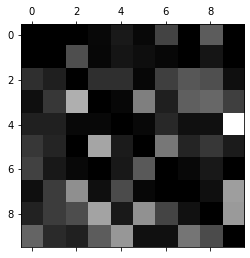

In [30]:
row_sums = conf_mx1.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx1 / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [9]:
X.score(X_test,y_test)

0.9376190476190476

In [10]:
submission=pd.DataFrame(X.predict(df_test),index=range(1,28001),columns=['Label'])
submission.index.name='ImageId'
submission.to_csv('submission01.csv')

In [16]:
start=datetime.datetime.now()
train = df_train.drop("label",1)
pca = PCA(n_components=0.95)
pca.fit(train)
transform_train = pca.transform(train)
transform_test = pca.transform(df_test)
print("Success!")
end=datetime.datetime.now()
print(end-start)

Success!
0:00:03.467727


In [17]:
target = df_train["label"]

In [18]:
rf.fit(transform_train, target)
results=rf.predict(transform_test)

# prepare submit file

np.savetxt('submission2.csv', 
           np.c_[range(1,len(df_test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')